In [117]:
import pandas as pd
file_path = "C:/Users/teamo/PycharmProjects/Data-Analyse/winemag-data_first150k.csv"
reviews = pd.read_csv(file_path,index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# 产品中葡萄酒产区及其产量

Text(0, 0.5, 'Value')

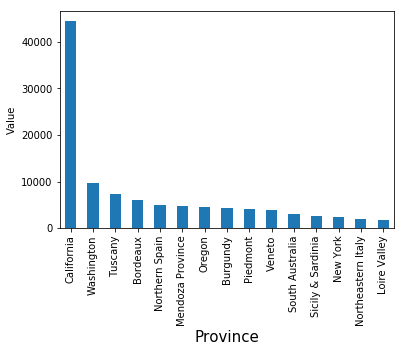

In [24]:
from matplotlib import pyplot as plt
reviews['province'].value_counts().head(15).plot.bar()

# 绝对值

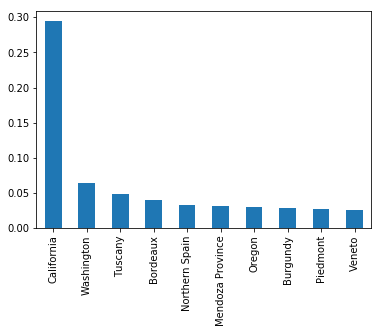

In [13]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

- 数据表明，将近有三分之一的加州酒都得到酒评家的评分

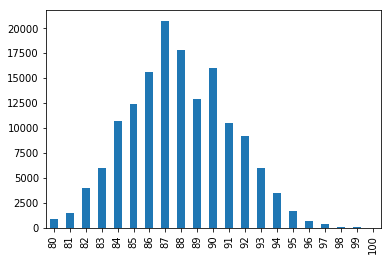

In [17]:
reviews['points'].value_counts().sort_index().plot.bar()

- 显然，在Wine Magazine杂志中，所有酒的评分都在80-100分之间，从后面95-100分之间看出，能够获得这个分段的葡萄酒占很少数。

## Line Chart

Text(0, 0.5, 'Value')

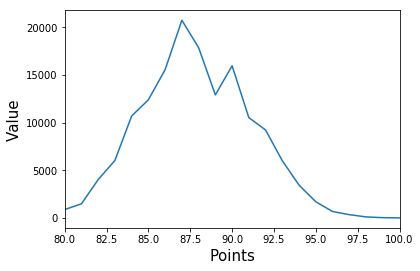

In [29]:
reviews['points'].value_counts().sort_index().plot.line()
plt.xlabel('Points',fontsize=15)
plt.ylabel('Value',fontsize=15)

- 若要呈现的值含有很多种可能，则应该使用线图来对数据进行可视化

## Area Chart

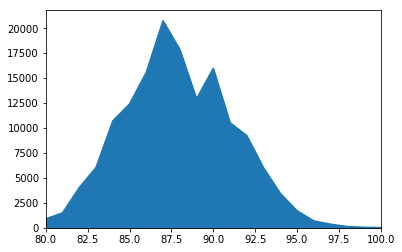

In [32]:
reviews['points'].value_counts().sort_index().plot.area()

- 当变量只有一个的时候，面积图和线图的区别在于填充区域的范围对应线图的内容，此时他们是可交换使用。

## Interval data--任何具有无限多个可能值的变量肯定是区间变量 

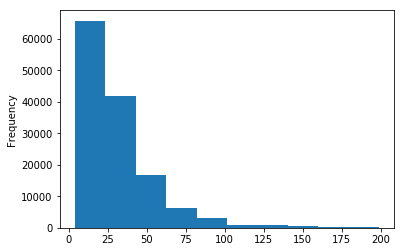

In [37]:
reviews['price']
reviews[reviews['price'] < 200]['price'].plot.hist()

- histogram与Bar图的区别：每一条柱状图形不是代表单一数值，而是代表范围值。
- 缺点：之所以在先前定义price在200美元内，因为它们将空间分成均匀间隔，所以它们不能很好地处理呈现偏差较大的数据，如：

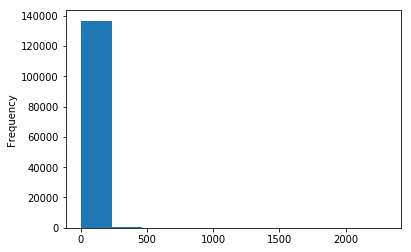

In [92]:
reviews['price'].plot.hist()

- 由于酒类的价格区间太大，如果全部都囊括，会影响后面数据的可视化。

### 因此建议针对特定的区间范围(变化、数量上较明显的区域)对数据进行可视化。

In [44]:
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


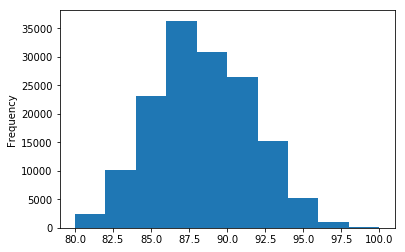

In [56]:
reviews['points'].plot.hist()

# 双变量的情况下绘图。 

- 变量之间没有关系的数据是空白画布的数据科学等价物
- 两个变量之间是如何交互的？
- 一个变量的增长是否与另一个变量的增长有关呢？亦或是与另一个变量的降低而有关联？

- 多变量的4种图表类型应用：
    - Scatter Plots
    - Hex Plots
    - Stacked bar charts and area charts
    - Bivariate line charts

In [71]:
import pandas as pd
reviews = pd.read_csv("C:/Users/teamo/PycharmProjects/Data-Analyse/winemag-data_first150k.csv",index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Scatter

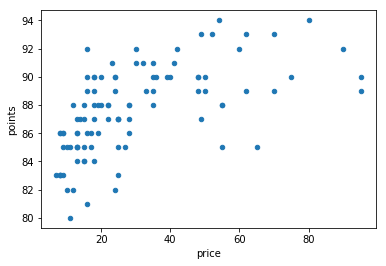

In [66]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price',y='points') #sample()采样数量

- 上述图表表明，酒类的价格和酒评家评分有着一定的关联性
- 价格越高葡萄酒通常往往得分相对较高。
- 散点图(当酒的价格和评分同时相同时)，点不会重叠，

#### 降采样(downsample) 

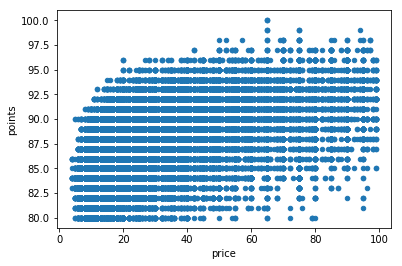

In [70]:
reviews[reviews['price'] < 100].plot.scatter(x='price',y='points')

- 由于复点的问题，所以散点图尽量用于处理样数较少的数据或者单一变量对应着数值不一的另一个变量。

## Hexplot 

### 十六进制图将空间中的点聚合为六边形，然后根据其中的值为这些六边形着色

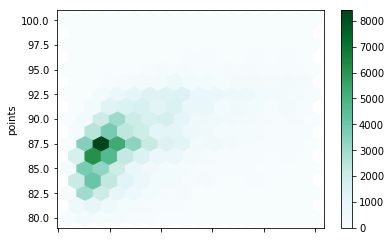

In [74]:
reviews[reviews['price'] < 100].plot.hexbin(x='price',y='points',gridsize=15)

- 从上图可得知：在Winemagazine中，普遍葡萄酒的价格位于20dollars和87.5分。

### #除此之外，可以将十六进制图和散点图应用于区间变量和/或序数分类变量的组合。 

## Stacked Plots(堆叠图）

### 图表堆叠是将两个变量同时绘制在一个图表之上。

In [77]:
wine_counts = pd.read_csv("C:/Users/teamo/PycharmProjects/Data-Analyse/top-five-wine-score-counts.csv",index_col=0)
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


### 大部分多变量的图表用这种形式绘制数据：列中有一个分类变量，行中有一个分类变量，条目中有交叉点的计数。 

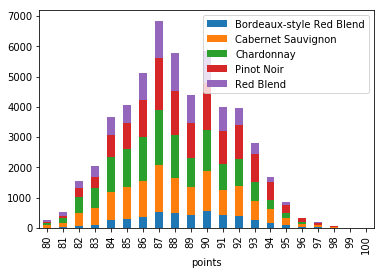

In [79]:
wine_counts.plot.bar(stacked=True)

- 堆积条形图分享单变量条形图的优点和缺点。 它们最适用于无序分类变量或少数有序分类变量。
- 另一个简单的例子是区域图，它非常自然地适用于这种形式的操作,如下图：

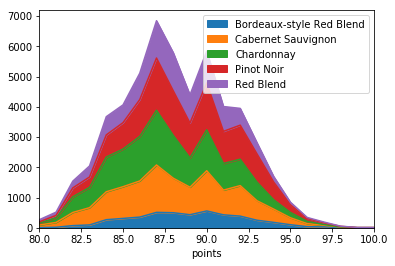

In [83]:
wine_counts.plot.area()

### 总结： 

- 与单变量面积图一样，多变量面积图表用于无序分类变量或区间变量。
- 堆积条形图在视觉上非常漂亮。 但是，它们有两个主要限制：
- 1.First Limitation：堆积条形图中的第二个变量必须是具有非常有限数量的可能值的变量（此处是有序分类变量）。
    - 五种不同类型的葡萄酒是一个很好的数字，因为它可保证结果的可读性; 
    - 有时会提到8作为建议的上限。 许多数据集字段自然不适合这个准则，所以你必须通过选择一组感兴趣的数据呈现方式。
- 2.Seconde Limitation:可解释性
    -  尽管它们很容易制作，并且看起来很漂亮，但是堆积的图形使得很难区分具体的值。
    - 例如，看看上面的情节，你能告诉哪一款葡萄酒的得分经常是87分：混酿红，黑皮诺或霞多丽（绿色）？ 

## Biviriate Line Chart

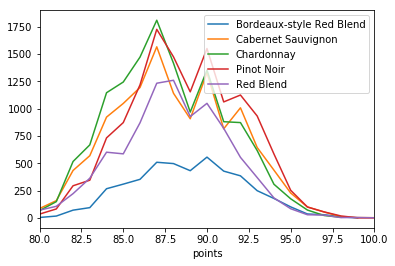

In [95]:
wine_counts.plot.line()

- 由于此图表中的线条占用的视觉空间非常小，因此在同一图表上覆盖多条线条非常简单有效。
- 使用多元线图可以很好地解决堆积条形图的第二个局限点：可解释性。双变量线图更易于理解，因为线条本身不会占用太多空间。 当我们并排放置多条线时，它们的值仍然可读，如此处所示。
- 在上图中，可以轻易看出，获得87.5分最多的葡萄酒类型是霞多丽。这是在条形堆积图或面积图中都是不容易看到的。

# Pokemon Analyse

In [48]:
pd.set_option('max_columns',None)
pokemon = pd.read_csv("C:/Users/teamo/PycharmProjects/Data-Analyse/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


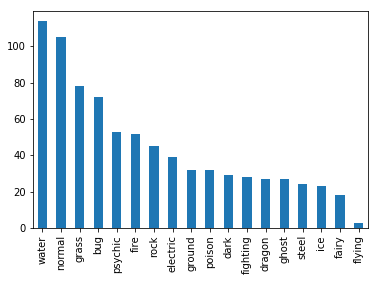

In [50]:
pokemon['type1'].value_counts().plot.bar()

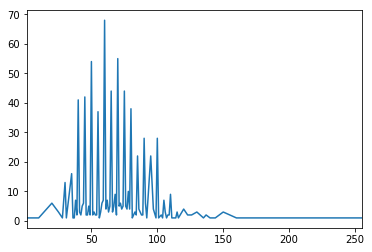

In [53]:
pokemon['hp'].value_counts().sort_index().plot.line()

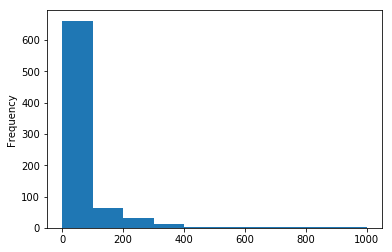

In [96]:
pokemon['weight_kg'].plot.hist()

In [98]:
pokemon = pd.read_csv("C:/Users/teamo/PycharmProjects/Data-Analyse/pokemon.csv",index_col=0)
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


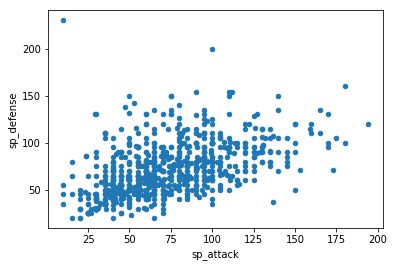

In [103]:
pokemon[pokemon['sp_attack'] < 200].plot.scatter(x='sp_attack',y='sp_defense') 

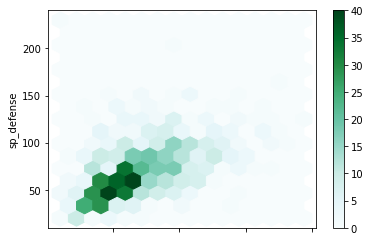

In [107]:
pokemon[pokemon['sp_attack'] < 200].plot.hexbin(x='sp_attack',y='sp_defense',gridsize=15)

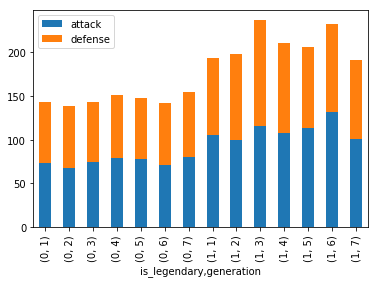

In [113]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]
pokemon_stats_legendary.plot.bar(stacked=True)

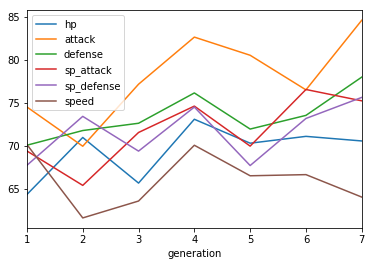

In [115]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
pokemon_stats_by_generation.plot.line()